In [1]:
import sys
sys.path.append('..')
sys.path.append('../../BHS_Persistence/')
sys.path.append('../../BHS_Core/')

from data import * 
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib import ticker
from matplotlib import cm 

from analysis.graph import *

In [2]:
data_source = analysis_data_source()

In [3]:
# data_source = analysis_data_source()
data = data_source.cesspit_increase(the_date=datetime.now(), days_in_past=28)

Text(0, 0.5, 'Δ [%]')

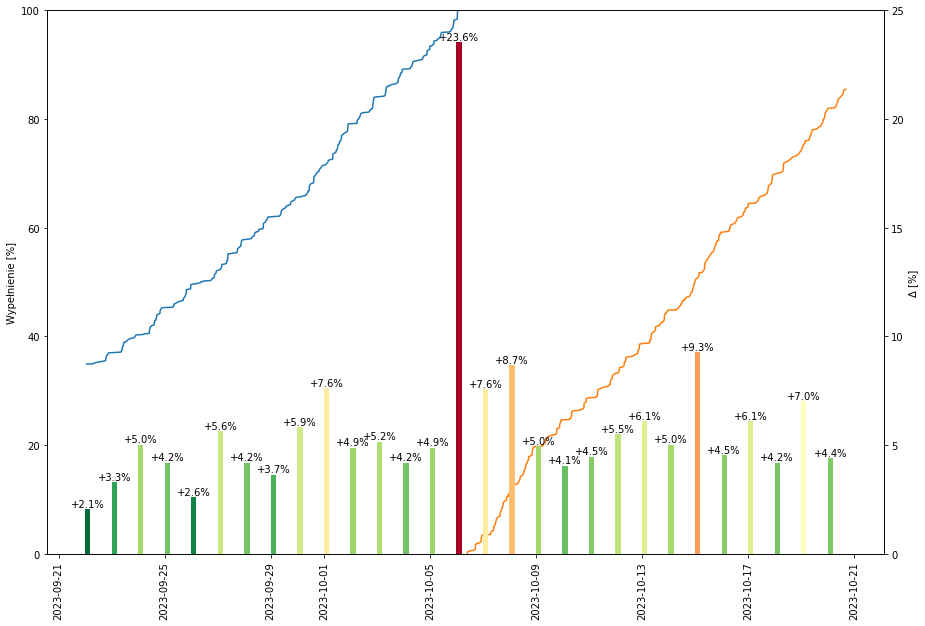

In [4]:
figure, ax = plt.subplots(figsize=(15, 10))

_axis_continuous = ax
_axis_daily = ax.twinx()
ax.xaxis.set_tick_params(labelrotation=90)
cmap = cm.get_cmap(name='RdYlGn_r')

_timeline_per_day = data.get_per_day_timeline()
_deltas_per_day = data.get_per_day_deltas_perc(tank_full=500, tank_empty=1952)
_bars = _axis_daily.bar(_timeline_per_day, _deltas_per_day, width = 0.2, align='edge', color = [cmap((_d-2)/10) for _d in _deltas_per_day])
_axis_daily.bar_label(_bars, [f'+{_d:.1f}%' for _d in _deltas_per_day])

for _tm, _lv in zip(data.get_continuous_timeline(), data.get_continuous_fill_perc(tank_full_mm=500, tank_empty_mm=1952)):
    _axis_continuous.plot(_tm, _lv)

_axis_continuous.set_ylim(0, 100)
_axis_continuous.set_ylabel(f'Wypełnienie [%]')
_axis_daily.set_ylim(0, 25)
_axis_daily.set_ylabel(f'\u0394 [%]')


___

ValueError: Cache should be extended providing declared span as tuple, where first element is starting and second ending point in time

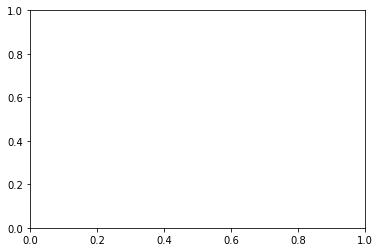

In [6]:
Last24hCesspitGraph(data_source, tank_full_mm=500, tank_empty_mm=1952)